In [1]:
# compare_models.ipynb (Cell 1: Setup and Data Collection)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from models import train_and_evaluate_models, DATA_PATH # Import the function

sns.set_style("whitegrid")

# Run the pipeline to get the final results dictionary
# Note: This will re-run the entire training process!
all_results, X_test, y_test, X_test_scaled, scaler = train_and_evaluate_models(DATA_PATH)

# Convert results dictionary into a DataFrame for easy plotting
results_df = pd.DataFrame(all_results).T # .T transposes the DataFrame
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

print("Model Comparison Data:")
results_df.head()

Successfully loaded data with shape: (478, 22)
--Start Initial Data Cleaning--
imputing missing values in numerical columns...
Imputed missing values in column 'number_of_cells' with median value 216.00
Imputed missing values in column 'torque_nm' with median value 430.00
Imputed missing values in column 'fast_charging_power_kw_dc' with median value 113.00
Imputed missing values in column 'towing_capacity_kg' with median value 1000.00
Handling missing CATEGORICAL data ('Missing' label imputation)...
Imputed missing values in column 'model' with label 'Missing'
Imputed missing values in column 'fast_charge_port' with label 'Missing'
Imputed missing values in column 'cargo_volume_l' with label 'Missing'
Total missing values after imputation: 0
--Data Cleaning Completed--
Starting Feature Engineering...
One-Hot Encoding the following categorical columns: ['brand', 'model', 'battery_type', 'fast_charge_port', 'cargo_volume_l', 'drivetrain', 'segment', 'car_body_type', 'source_url']
Orignal

c:\Users\Administrator\Whole project practice\utils.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True) #imputing missing values with median
c:\Users\Administrator\Whole project practice\utils.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

Random Forest Regressor
MAE: 14.93
R2: 0.96
________________________________________

Training K-Nearest Neighbors Regressor...
K-Nearest Neighbors Regressor
MAE: 64.11
R2: 0.44
________________________________________
Model Comparison Data:


c:\Users\Administrator\anaconda3\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


,Model,MAE,RMSE,R2
0,Linear Regression,38.931979,46.333839,0.797120
1,Random Forest Regressor,14.926562,20.562572,0.960043
2,K-Nearest Neighbors Regressor,64.114583,76.839457,0.442030


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20088\1702666991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df.sort_values(by='MAE', ascending=True), palette='plasma')


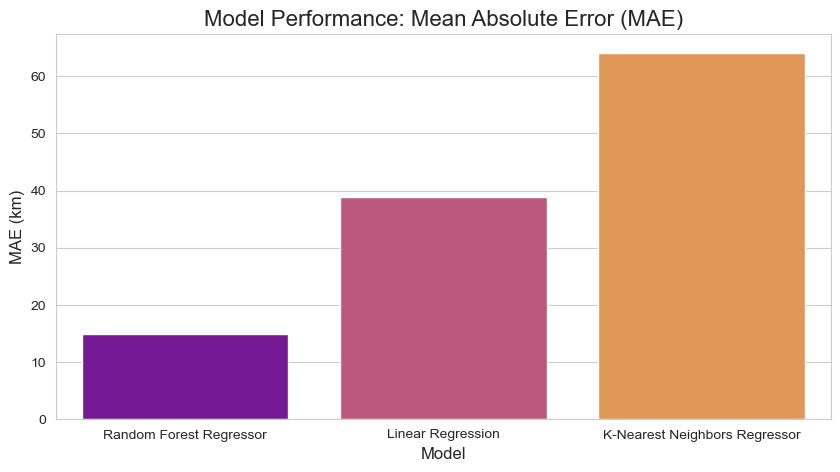

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20088\1702666991.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df.sort_values(by='R2', ascending=False), palette='viridis')


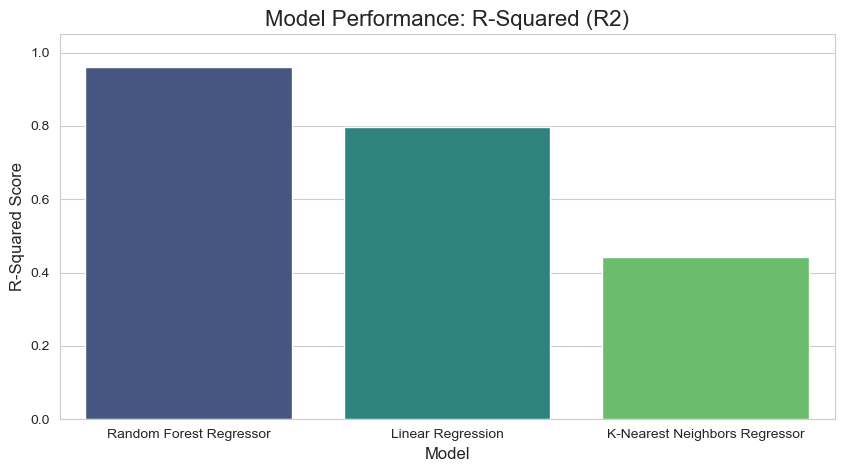

In [2]:
# compare_models.ipynb (Cell 2: Visualization)

# --- 1. MAE Comparison Bar Chart ---
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='MAE', data=results_df.sort_values(by='MAE', ascending=True), palette='plasma')
plt.title('Model Performance: Mean Absolute Error (MAE)', fontsize=16)
plt.ylabel('MAE (km)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

# --- 2. R2 Comparison Bar Chart ---
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2', data=results_df.sort_values(by='R2', ascending=False), palette='viridis')
plt.title('Model Performance: R-Squared (R2)', fontsize=16)
plt.ylabel('R-Squared Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.05) # R2 score is bounded by 1.0
plt.show()